In [1]:
import pandas as pd

In [2]:
updrs3_file = './data/MDS_UPDRS_Part_III.csv'
updrs3_df = pd.read_csv(updrs3_file)

In [3]:
updrs3_df.describe()

,REC_ID,PATNO,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,PN3RIGRL,NP3RIGLL,NP3FTAPR,...,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,DYSKPRES,DYSKIRAT,NHY,ANNUAL_TIME_BTW_DOSE_NUPDRS,ON_OFF_DOSE,PD_MED_USE
count,1.484000e+04,14840.000000,14838.000000,14837.000000,14837.000000,14837.000000,14837.000000,14835.000000,14834.000000,14836.000000,...,14836.000000,14836.000000,14835.000000,14834.000000,14832.000000,927.000000,14830.000000,4581.000000,7737.000000,9753.000000
mean,5.396859e+08,22571.170620,0.478501,0.896812,0.614343,0.835344,0.705803,0.537782,0.511056,0.844028,...,0.117822,0.112429,0.056488,0.854456,0.051241,0.059331,1.293392,7.107670,1.360476,2.464370
std,1.340951e+08,24251.066491,0.658448,0.857658,0.832220,0.879837,0.860710,0.807541,0.807614,0.914663,...,0.421854,0.412026,0.278028,1.217160,0.220495,0.236371,0.972217,7.982632,0.480170,2.376349
min,2.309658e+08,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.193739e+08,3434.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,1.000000,0.000000
50%,5.470369e+08,4005.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.133300,1.000000,1.000000
75%,6.582263e+08,42164.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,12.666700,2.000000,4.000000
max,7.544579e+08,92834.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,4.000000,1.000000,1.000000,5.000000,99.000000,2.000000,7.000000


<h4> Number of patients in UPDRS 3 file </h4>

In [4]:
len(updrs3_df.PATNO.unique())

2114

<h4> Check for any null columns </h4>

In [5]:
updrs3_df.columns[updrs3_df.isnull().all()]

Index([], dtype='object')

#### Get enrolled patients status:

In [6]:
all_patients = pd.read_csv('./data/Patient_Status.csv')
#all_patients = all_patients.loc[all_patients['ENROLL_CAT'].notnull()])
all_patients = all_patients.loc[all_patients['ENROLL_CAT'].isin(['PD', "GENPD"]), ('PATNO', 'ENROLL_CAT')]

#### Get count of patients based on cohorts in UPDRS3 :

In [7]:
updrs3_df = updrs3_df.merge(all_patients, how='outer', on=['PATNO'])
updrs3_df.groupby('ENROLL_CAT').count()[['PATNO']]

,PATNO
ENROLL_CAT,
GENPD,2359
PD,6950


In [8]:
updrs2_file = './data/MDS_UPDRS_Part_II__Patient_Questionnaire.csv'
updrs2_df = pd.read_csv(updrs2_file)

In [9]:
print(updrs2_df.loc[(updrs2_df['PATNO'] == 3400) & (updrs2_df['EVENT_ID'] == 'V04')])

        REC_ID F_STATUS  PATNO EVENT_ID  PAG_NAME   INFODT  NUPSOURC  NP2SPCH  \
346  303557801        V   3400      V04  NUPDRS2P  07/2011         1        1   

     NP2SALV  NP2SWAL  ...  NP2HOBB  NP2TURN  NP2TRMR  NP2RISE  NP2WALK  \
346        2        1  ...      3.0      1.0      1.0      1.0      2.0   

     NP2FREZ  ORIG_ENTRY            LAST_UPDATE  QUERY  SITE_APRV  
346      1.0     07/2011  2011-07-05 09:47:47.0    NaN    07/2011  

[1 rows x 24 columns]


In [10]:
(updrs3_df.loc[(updrs3_df['PATNO'] == 34001) & (updrs3_df['EVENT_ID'] == 'V04')]).empty

True

In [117]:
merged = pd.read_csv('./preprocessed/final_data.csv')
merged.drop_duplicates(subset=["PATNO", "EVENT_ID"], keep="first", inplace=True)
merged[merged.duplicated(subset=["PATNO", "EVENT_ID"])]

,PATNO,EVENT_ID,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,...,NHY,ANNUAL_TIME_BTW_DOSE_NUPDRS,ON_OFF_DOSE,PD_MED_USE,IS_TREATED,ENROLL_CAT,UPDRS_II,UPDRS_III,UPDRS_II_AND_III,TOTAL


In [12]:
merged.replace({
'EVENT_ID' : {"BL": 0, "V01": 1, "V02": 2, "V03": 3, "V04": 4, "V05": 5, "V06": 6, "V07": 7, "V08": 8,
                     "V09": 9, "V10": 10, "V11": 11, "V12": 12, "V13": 13, "V14": 14, "ST": -1}
}, inplace=True)

In [13]:
merged.loc[merged['NP2SPCH'].isna(), :]

,PATNO,EVENT_ID,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,...,NHY,ANNUAL_TIME_BTW_DOSE_NUPDRS,ON_OFF_DOSE,PD_MED_USE,IS_TREATED,ENROLL_CAT,UPDRS_II,UPDRS_III,UPDRS_II_AND_III,TOTAL
590,3415,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,3.0,0.0,PD,0.0,27.0,27.0,27.0
1219,3305,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,3.0,1.0,PD,0.0,38.0,38.0,38.0
3907,4074,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,5.9167,2.0,1.0,1.0,PD,0.0,32.0,32.0,32.0
3997,3026,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,0.0,0.0,PD,0.0,18.0,18.0,18.0
4066,4073,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.7500,2.0,1.0,1.0,PD,0.0,20.0,20.0,20.0
4076,4076,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.6167,2.0,1.0,1.0,PD,0.0,28.0,28.0,28.0
4086,4077,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,16.4667,1.0,1.0,1.0,PD,0.0,21.0,21.0,21.0
5337,40784,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,7.0,0.0,REGPD,0.0,10.0,10.0,10.0
6020,40731,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.3333,2.0,7.0,0.0,GENPD,0.0,21.0,21.0,21.0
7184,40515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,REGPD,0.0,0.0,0.0,0.0


In [73]:
merged.filter(regex="NP3.*").columns

Index(['NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGLL',
       'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL',
       'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT',
       'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML',
       'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL',
       'NP3RTALJ', 'NP3RTCON'],
      dtype='object')

#### -1 comes for only 'ST' event in entire dataframe:

In [91]:
merged.isin(['-1']).any().values

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [121]:
test = pd.DataFrame({'month': [1, 4, 7, 10],'year': [2012, 2014, 2013, 2014],'sale': [55, 40, 84, 31]})

In [122]:
multi_index = pd.MultiIndex.from_product([test['year'].unique(), range(1,13)], names=['year', 'month'])
test = test.set_index(['year','month']).reindex(multi_index).reset_index()

No of patients with atleast 10 events:

In [119]:
sum(merged.groupby(['PATNO']).count()['EVENT_ID'] >= 10)

397

### Plot the UPDRS 3/Ambulatory scores on merged data for some random patients:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def plot_updrs3(data, patient_ids):
    updrs3_scores = np.empty((17,))
    updrs3_scores[:] = float('NaN')
    for pat_id in patient_ids:
        pat_data = data.loc[data['PATNO'] == pat_id]
        pat_data = pat_data.loc[data['IS_TREATED_0.0'] == 1]
        updrs3_scores[pat_data['EVENT_ID'].values] = pat_data['TOTAL_UPDRS3']
        #up3_scores = pat_data['TOTAL_UPDRS3'].replace(-1, float('NaN'))
        #print(pat_data['EVENT_ID'].values)
        plt.plot(range(0,17), updrs3_scores)
    plt.xlabel('Events')
    plt.ylabel('Total UPDRS3 score')
    plt.show()

#### Create plots for ambul scores:

In [28]:
def plot_ambu_scores(data, patient_ids):
    ambul_scores = np.empty((17,))
    ambul_scores[:] = float('NaN')
    for pat_id in patient_ids:
        pat_data = data.loc[data['PATNO'] == pat_id]
        pat_data = pat_data.loc[data['IS_TREATED_0.0'] == 1]
        ambul_scores[pat_data['EVENT_ID'].values] = pat_data['AMBUL_SCORE']
        #up3_scores = pat_data['TOTAL_UPDRS3'].replace(-1, float('NaN'))
        #print(pat_data['EVENT_ID'].values)
        plt.plot(range(0,17), ambul_scores)
    plt.xlabel('Events')
    plt.ylabel('Total Ambulatory score')
    plt.show()

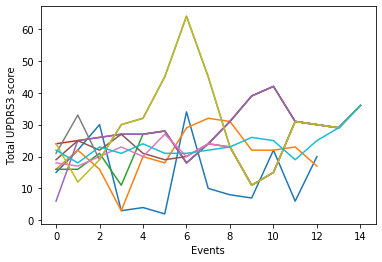

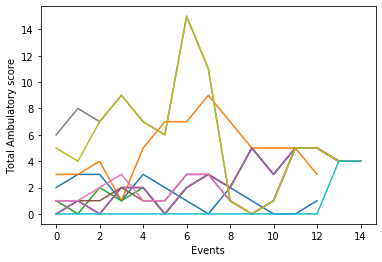

In [30]:
compl_data = pd.read_csv('./preprocessed/final_merged_na_removed.csv')
#compl_data.loc[:, 'TOTAL_UPDRS3'] = compl_data.filter(regex="NP3.*").sum(axis=1)

all_pat_ids = compl_data['PATNO'].unique()
rand_pat_id = np.random.randint(0, len(all_pat_ids), size=10)
pat_ids = all_pat_ids[rand_pat_id]
plot_updrs3(compl_data, pat_ids)
plot_ambu_scores(compl_data, pat_ids)